In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from tqdm.notebook import tqdm

import os
import re
import socket
import subprocess
import sys

sns.set_style("whitegrid")
np.set_printoptions(suppress=True, precision=2, threshold=20)
pd.set_option('display.max_rows', 500)
sys.path += ['../src/']

display(HTML("<h3>Runned on %s</h3><h4>Last commit: %s</h4><h4>Conda env: %s</h4>" % (
    socket.gethostname(),
    subprocess.run(["git","log", "-1", "--pretty=%h %s"],
        check=False, capture_output=True).stdout.decode() or 'none.',
    (re.findall(""".*envs[\\\/](.*?)[\\\/]""", sys.executable) or [sys.executable])[0]
)))

In [2]:
sns.set_theme(context='poster', style='white')
import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['legend.frameon'] = 'True'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['legend.title_fontsize'] = 'small'

In [3]:
eps = 0.5
beta = 15
T = 10000
N = 50

murange = np.linspace(0, 0.5, 501)
generation_seed = 1

n_ic = 10
n_trials = 10
mu_range = np.array([0.1, 0.2, 0.3, 0.4]) # 
n_range = np.array([100, 500, 1000]) # 
mu_star_list = np.zeros((n_ic, len(mu_range), len(n_range), n_trials))

In [4]:
dfs = []
for c, mu in enumerate(mu_range):
    dfs_singleN = []
    for ct, N in enumerate(n_range):
        try:
            df_tmp = pd.read_csv(f'../outputs/mle_mu_over_N_mu_{n_trials}_{eps}_{mu}_{beta}_{N}_{T}_{generation_seed}.csv', index_col=0)
            df_tmp = df_tmp.stack().reset_index()
            df_tmp['N'] = N
            df_tmp['T'] = T
            df_tmp['eps'] = eps
            df_tmp['mu'] = mu
            df_tmp.columns = ['x0i', 'trial', 'mu_hat', 'N', 'T', 'eps', 'mu']
            df_tmp['mu_err'] = df_tmp.mu_hat - df_tmp.mu
            if N==100:
                df_tmp['mu'] = mu-0.005
            elif N==500:
                df_tmp['mu'] = mu
            elif N==1000:
                df_tmp['mu'] = mu+0.005
            dfs_singleN.append(df_tmp)
        except:
            continue
    if len(dfs_singleN)>0:
        dfs.append(pd.concat(dfs_singleN))

In [5]:
plt.rcParams['text.usetex'] = True

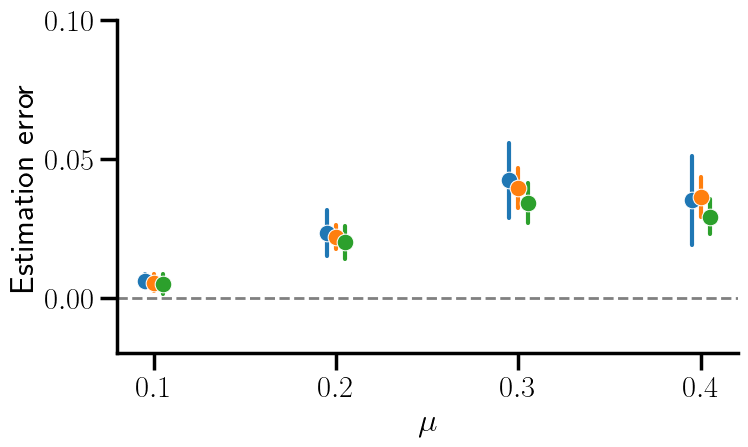

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))

for df in dfs:
    # df.groupby('N').mu_hat.mean().plot(style='o-')
    sns.lineplot(data=df, x='mu', y='mu_err', hue='N', errorbar=('sd', 1), err_style='bars', marker='o', legend=False, linestyle='', palette='tab10')
# plt.legend(dfs[0].N.unique(), title="N", fontsize=15)
plt.axhline(0., ls='--', c='grey', lw=2)
plt.ylim([-0.02, 0.1])
plt.xticks([0.1, 0.2, 0.3, 0.4])
plt.yticks([0.0, 0.05, 0.1])
plt.ylabel('Estimation error')
plt.xlabel(r'$\mu$')
sns.despine()
plt.tight_layout()
# plt.savefig(f'../figs/mu_over_N_T_err.pdf')

In [9]:
mu = 0.3

t_range = np.array([1000, 5000, 10000, 20000]) # 
n_range = np.array([100, 500, 1000])

In [10]:
dfs = []
for c, T in enumerate(t_range):
    dfs_singleN = []
    for ct, N in enumerate(n_range):
        try:
            df_tmp = pd.read_csv(f'../outputs/mle_mu_over_N_T_{n_trials}_{eps}_{mu}_{beta}_{N}_{T}_{generation_seed}.csv', index_col=0)
            df_tmp = df_tmp.stack().reset_index()
            df_tmp['N'] = N
            if N==100:
                df_tmp['T'] = T-300
            elif N==500:
                df_tmp['T'] = T
            elif N==1000:
                df_tmp['T'] = T+300
            else:
                df_tmp['T'] = T-250
            df_tmp['eps'] = eps
            df_tmp['mu'] = mu
            df_tmp.columns = ['x0i', 'trial', 'mu_hat', 'N', 'T', 'eps', 'mu']
            df_tmp['mu_err'] = df_tmp.mu_hat - df_tmp.mu
            dfs_singleN.append(df_tmp)
        except:
            continue
    if len(dfs_singleN)>0:
        dfs.append(pd.concat(dfs_singleN))

In [11]:
dfs = pd.concat(dfs)

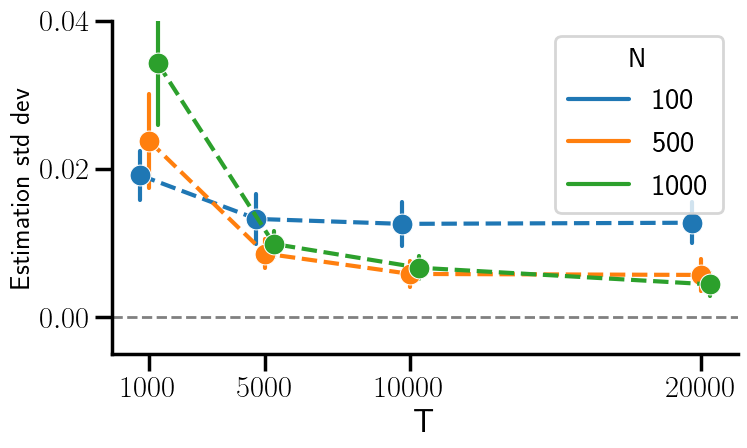

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

# for df in dfs:
# df.groupby('N').mu_hat.mean().plot(style='o-')
sns.lineplot(data=dfs.groupby(['N', 'T', 'eps', 'mu', 'x0i']).mu_hat.std().reset_index(), 
             x='T', y='mu_hat', hue='N', marker='o', linestyle='--', palette='tab10', errorbar=('sd', 1), err_style='bars', ms=15)
# plt.legend(dfs[0].mu.unique(), title="mu")
# plt.plot(mu_range, mu_range, ls='--', c='r')
# plt.axhline(eps, ls='--', c='r')
plt.ylim([-0.005, 0.04])
# plt.xlim([0., 1])
plt.ylabel('Estimation std dev', fontsize=20)
plt.yticks([0.0, 0.02, 0.04])
plt.xticks([1000, 5000, 10000, 20000])
plt.axhline(0., ls='--', c='grey', lw=2)
sns.despine()
plt.tight_layout()
# plt.savefig(f'../figs/mu_over_N_T_var.pdf')

In [ ]:
df_exp_ = pd.concat([pd.read_csv("/data/opdyn_identification/error_bias_rho_seed/exp_250515_sbcm_000.csv", index_col = 0),
           pd.read_csv("/data/opdyn_identification/error_bias_rho_seed/exp_250523_sbcm_000.csv", index_col = 0)])

In [14]:
df_exp_.loc[df_exp_.N==100, 'epsilon_real'] -= 0.01
df_exp_.loc[df_exp_.N==1000, 'epsilon_real'] += 0.01

In [15]:
plt.rcParams['text.usetex'] = True

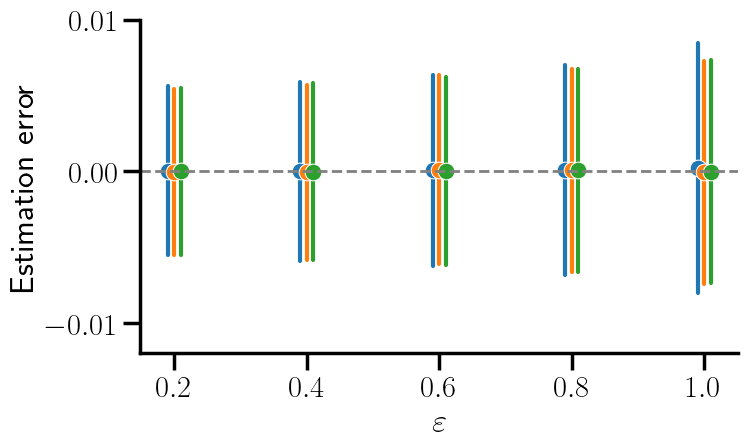

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

# for df in dfs:
    # df.groupby('N').mu_hat.mean().plot(style='o-')
# plt.legend(dfs[0].N.unique(), title="N", fontsize=15, loc='upper left')
sns.lineplot(data=df_exp_[df_exp_.epsilon_real<1.1], x='epsilon_real', y='empirical_error', hue='N', errorbar=('sd', 1), err_style='bars', marker='o', legend=False, linestyle='', palette='tab10')
plt.axhline(0., ls='--', c='grey', lw=2)
plt.ylim([-0.012, 0.01])
plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([-0.01, 0., 0.01])
plt.ylabel('Estimation error')
plt.xlabel(r'$\varepsilon$')
sns.despine()
plt.tight_layout()
# plt.savefig(f'../figs/eps_over_N_T_err.pdf')

In [17]:
df_std = df_exp_.groupby(['N', 'T', 'epsilon_real']).mle.std().reset_index()

In [18]:
df_std.loc[df_std.N==100, 'T'] -= 300
df_std.loc[df_std.N==1000, 'T'] += 300

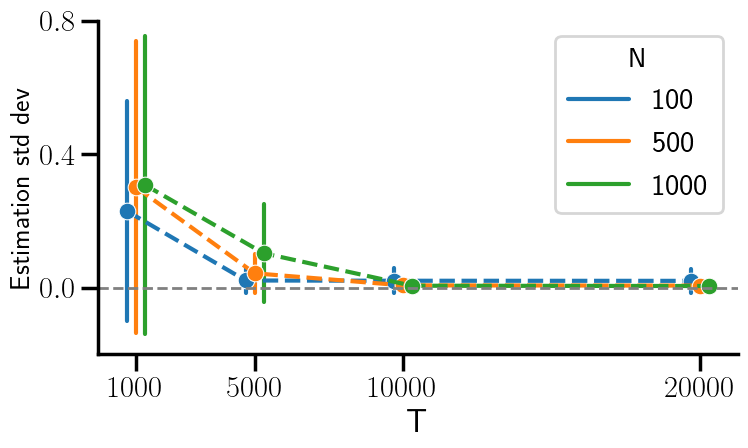

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

# for df in dfs:
# df.groupby('N').mu_hat.mean().plot(style='o-')
sns.lineplot(data=df_std, 
             x='T', y='mle', hue='N', marker='o', linestyle='--', palette='tab10', errorbar=('sd', 1), err_style='bars')
plt.ylabel('Estimation std dev', fontsize=20)
plt.yticks([0., 0.4, 0.8])
plt.xticks([1000, 5000, 10000, 20000])
# plt.legend(dfs[0].mu.unique(), title="mu")
# plt.plot(mu_range, mu_range, ls='--', c='r')
plt.axhline(0., ls='--', c='grey', lw=2)
plt.ylim([-0.2, 0.8])
# plt.xlim([0., 1])
sns.despine()
plt.tight_layout()
# plt.savefig(f'../figs/eps_over_N_T_var.pdf')